<a href="https://colab.research.google.com/github/IamRash-7/MNIST-ANN/blob/main/MNIST-ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_test)

10000

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

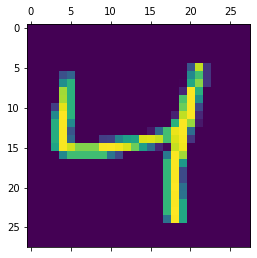

In [ ]:
plt.matshow(X_train[2])

In [ ]:
y_train[2]

4

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train_flat=X_train.reshape(len(X_train),28*28)

In [ ]:
X_train_flat.shape

(60000, 784)

In [ ]:
X_test_flat=X_test.reshape(len(X_test),28*28)

In [ ]:
X_test_flat.shape

(10000, 784)

In [ ]:
model= keras.Sequential([
  keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4904 - accuracy: 0.8762
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3067 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2857 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2749 - accuracy: 0.9246
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2678 - accuracy: 0.9259


In [ ]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 0s 864us/step - loss: 0.2667 - accuracy: 0.9264


[0.26667726039886475, 0.9264000058174133]

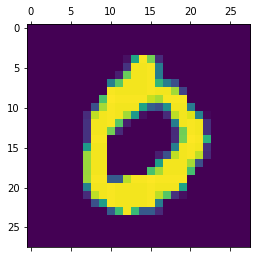

In [ ]:
plt.matshow(X_test[3])

In [ ]:
y_pred = model.predict(X_test_flat)

In [ ]:
y_pred[3]

array([1.4356047e-02, 4.8942214e-14, 9.5898042e-07, 2.5050340e-08,
       3.3793279e-10, 9.8160410e-07, 1.5863536e-06, 1.9025634e-07,
       4.2891614e-07, 1.3858865e-07], dtype=float32)

In [ ]:
np.argmax(y_pred[3])

0

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_pred]

In [ ]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    1,    1,    0,    6,   10,    4,    3,    0],
       [   0, 1109,    4,    1,    0,    1,    4,    2,   14,    0],
       [   3,    8,  927,   12,   11,    6,   11,   10,   41,    3],
       [   2,    0,   21,  916,    0,   24,    2,   15,   24,    6],
       [   1,    1,    2,    1,  935,    0,   10,    3,    8,   21],
       [   7,    3,    2,   26,   13,  779,   16,    7,   34,    5],
       [   6,    3,    7,    1,    8,   13,  915,    2,    3,    0],
       [   1,    5,   24,    3,    9,    1,    0,  962,    2,   21],
       [   4,    7,    6,   16,    9,   23,   10,   14,  880,    5],
       [   8,    7,    2,    9,   44,    6,    0,   37,   10,  886]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

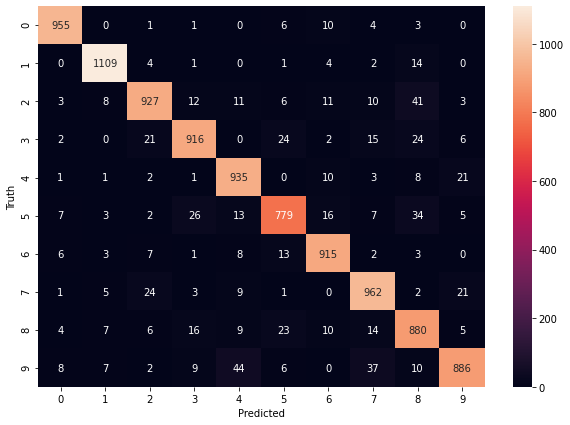

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2920 - accuracy: 0.9179
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1306 - accuracy: 0.9616
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0937 - accuracy: 0.9719
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0738 - accuracy: 0.9778
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0593 - accuracy: 0.9825


In [ ]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0849 - accuracy: 0.9744


[0.084934301674366, 0.974399983882904]

Text(69.0, 0.5, 'Truth')

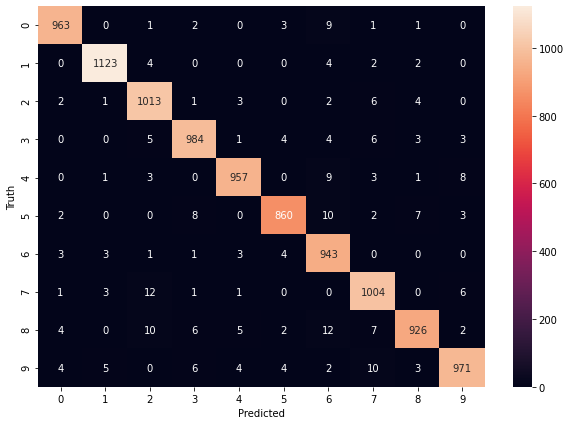

In [ ]:
y_predicted = model.predict(X_test_flat)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='Nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2896 - accuracy: 0.9196
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1394 - accuracy: 0.9596
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1002 - accuracy: 0.9697
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0778 - accuracy: 0.9770
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0618 - accuracy: 0.9816


In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0860 - accuracy: 0.9762


[0.08600407093763351, 0.9761999845504761]